In [25]:
#Q1 Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case inclass.
# a. Do you think we should keep this feature?

import pandas as pd

# Assuming the CSV data is stored in a variable called 'csv_data'
data = pd.read_csv('C:/Users/gowth/Desktop/UCM/ML/Assignment 4/Dataset/train.csv')

# Convert 'Sex' column to numerical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Calculate the correlation
correlation = data[['Survived', 'Sex']].corr().iloc[0, 1]
print("Correlation between 'Survived' and 'Sex':", correlation)


Correlation between 'Survived' and 'Sex': 0.5433513806577526


Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


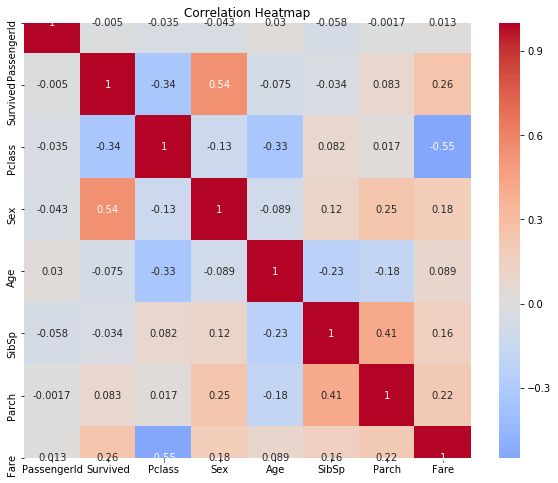

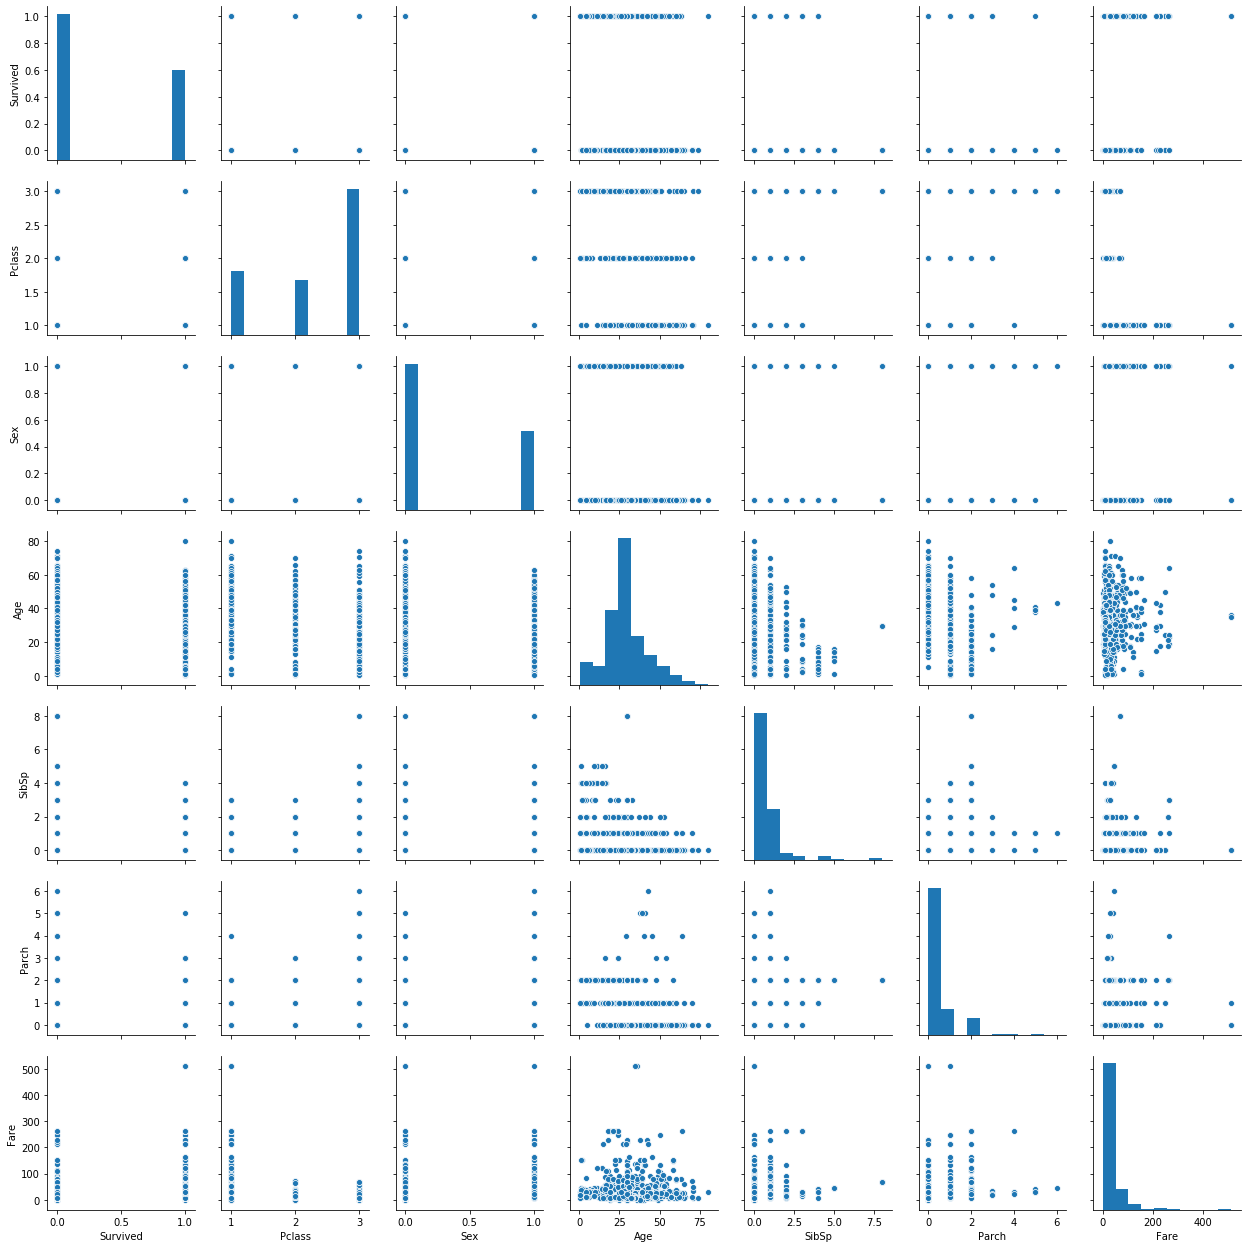

In [29]:
#Q2 Do at least two visualizations to describe or show correlations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('C:/Users/gowth/Desktop/UCM/ML/Assignment 4/Dataset/train.csv')
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Find and handle missing values
print("Number of missing values in each column:")
print(data.isna().sum())

# Fill missing values in 'Age' with the mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

# You can choose to fill other missing values or drop the rows with missing values.
# For example, to drop rows with missing values in the 'Embarked' column:
data.dropna(subset=['Embarked'], inplace=True)

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(data[selected_features])
plt.show()


In [28]:
#Q3 Implement Naïve Bayes method using scikit-learn library and report the accuracy. 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Handling missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Selecting features and target
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)  
print("Accuracy of Naïve Bayes model:", accuracy)


Accuracy of Naïve Bayes model: 0.7921348314606742
